In [6]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np
import dateparser
import panel as pn

pn.extension()

%matplotlib inline

In [7]:
# Local imports
import sys
sys.path.append("../lib2")

from Constants import Constants
from ProcessingTools import DateProcessingTools

In [8]:
# Construct the tools
debug_level = 0
constants = Constants()
tool_data_processing = DateProcessingTools(debug_level)


In [9]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)
atlas2          = pd.read_pickle(constants.PREPROCESSED_ATLAS_2_FILE_PATH)


In [15]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [16]:
atlas2.head()

,Number of Users,Invoice Date,Invoice #,Invoice Amount,Subscription,Account Code,Address,Lat,Long,Service Start,Service End,Subscription Duration
Customers,,,,,,,,,,,,
University 1,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",30.460190,-91.188530,2015-03-18 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 2,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 3,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2015-06-10 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 4,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",44.663780,-74.978409,2015-06-01 00:00:00-04:00,2016-06-30 00:00:00-04:00,365 days
University 5,NaN,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",38.190601,-76.426300,2015-10-05 00:00:00-04:00,2016-09-30 00:00:00-04:00,365 days


In [66]:
# Calculate the mean values for each neighborhood
#rankings_pd.rename(columns = {'test':'TEST', 'odi':'ODI', 
#                              't20':'T20'}, inplace = True) 

#atlas2.columns = ["Customers", "Lat", "Long"]

total_data = atlas2.groupby(["Customers"]).sum()
total_data.reset_index(inplace=True)
total_data.dropna(inplace=True)
total_data


,Customers,Number of Users,Invoice Amount,Lat,Long
0,University 1,0.0,139000.00,60.920165,-182.377131
1,University 10,350.0,11200.01,119.196630,-270.740841
2,University 100,0.0,5460.00,28.062000,-82.413225
3,University 101,0.0,750.00,48.630369,-97.471056
4,University 102,1050.0,14500.00,0.000000,0.000000
...,...,...,...,...,...
420,University 95,35.0,1000.00,67.919161,-204.701498
421,University 96,25.0,2750.00,45.507856,-122.690794
422,University 97,2050.0,18275.00,195.482126,-577.409882
423,University 98,1000.0,14000.00,0.000000,0.000000


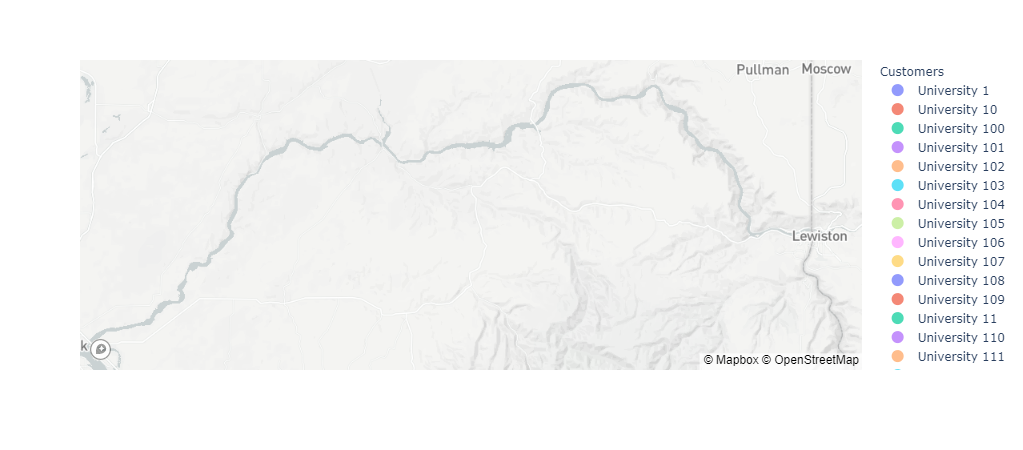

In [67]:
px.set_mapbox_access_token(mapbox_token)
map = px.scatter_mapbox(
    total_data,
    lat="Lat",
    lon="Long",
    size="Invoice Amount",
    color="Customers"
)
map.show()

In [68]:

total_data.hvplot(kind='line', figsize=(20, 10))


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [ ]:

# Construct a correlation table
Correlation = Combined_Returns.corr()
Correlation
sns.heatmap(Correlation, vmin=-1, vmax=1)

In [14]:
def neighborhood_map():
    """Neighborhood Map"""
     = atlas2.groupby(["Customers"]).mean()
    mean_data.reset_index(inplace=True)
    px.set_mapbox_access_token(mapbox_token)
    neighborhood_map_plot = px.scatter_mapbox(
            mean_data,
            lat="Lat",
            lon="Long",
            size="Subscription",
            color="Customer"
        )
    return neighborhood_map_plot
neighborhood_map()

ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['Customers', 'Number of Users', 'Invoice Amount', 'Lat', 'Long'] but received: Subscription